In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
hulu_df = pd.read_csv("Resources/hulu.csv")

hulu_df = hulu_df.set_index('Title')

hulu_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Attack on Titan,2013,16+,8.8,94%
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%
Community,2009,7+,8.5,88%
Parks and Recreation,2009,16+,8.6,93%
Twin Peaks,1990,18+,8.8,89%


In [3]:
imdb_average = hulu_df['IMDB'].mean()

imdb_average

7.0611074489123276

In [4]:
hulu_df_dropped = hulu_df.dropna()

hulu_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Attack on Titan,2013,16+,8.8,94%
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%
Community,2009,7+,8.5,88%
Parks and Recreation,2009,16+,8.6,93%
Twin Peaks,1990,18+,8.8,89%


In [5]:
hulu_df_dropped['RT'] = hulu_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)

hulu_df_dropped.head()

<ipython-input-5-0fbbaa2579bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df_dropped['RT'] = hulu_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
Attack on Titan,2013,16+,8.8,94%,94
Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100%,100
Community,2009,7+,8.5,88%,88
Parks and Recreation,2009,16+,8.6,93%,93
Twin Peaks,1990,18+,8.8,89%,89


In [6]:
rotten_average = hulu_df_dropped['RT'].mean()

age_group = hulu_df['Age'].mode()

total_shows = len(hulu_df)

title = hulu_df.index.to_list()

In [7]:
hulu_df.sort_values(by=['IMDB'], inplace=True, ascending=False)

highest_rated_imdb = hulu_df.index[0]

In [8]:
hulu_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)

hulu_df_dropped.head(100)

highest_rated_rt = hulu_df_dropped.index[0]

highest_rated_rt

<ipython-input-8-7f1bb70f672f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


'Fullmetal Alchemist: Brotherhood'

In [9]:
hulu = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rotten_average})
hulu

,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,1754,16+,Destiny,7.061107,Fullmetal Alchemist: Brotherhood,78.294286


In [10]:
hulu_df = hulu_df.reset_index()

bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]

groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']

pd.cut(hulu_df['Year'], bins, labels=groups)

0       2010-2020
1       2010-2020
2       1980-1989
3       2010-2020
4       2010-2020
          ...    
1749    2010-2020
1750    2010-2020
1751    2010-2020
1752    2010-2020
1753    2010-2020
Name: Year, Length: 1754, dtype: category
Categories (6, object): [1900-1949 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010-2020]

In [11]:
hulu_df['Age Range'] = pd.cut(hulu_df['Year'], bins, labels=groups)

hulu_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Destiny,2014,NaN,9.6,NaN,2010-2020
1,Hungry Henry,2014,NaN,9.5,NaN,2010-2020
2,The Joy of Painting,1983,all,9.4,NaN,1980-1989
3,Rick and Morty,2013,18+,9.2,94%,2010-2020
4,Leah Remini: Scientology and the Aftermath,2016,16+,9.1,NaN,2010-2020


In [12]:
age_range_df = hulu_df.groupby("Age Range")

age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Destiny,2014,NaN,9.6,NaN,2010-2020
1,Hungry Henry,2014,NaN,9.5,NaN,2010-2020
2,The Joy of Painting,1983,all,9.4,NaN,1980-1989
3,Rick and Morty,2013,18+,9.2,94%,2010-2020
4,Leah Remini: Scientology and the Aftermath,2016,16+,9.1,NaN,2010-2020
...,...,...,...,...,...,...
1367,Showtime at the Apollo,1987,NaN,5.5,NaN,1980-1989
1371,This Week,1981,7+,5.5,NaN,1980-1989
1388,The Munsters Today,1988,NaN,5.3,NaN,1980-1989
1394,Baywatch,1989,7+,5.3,NaN,1980-1989


In [13]:
ranges = age_range_df["Age Range"].count()

ranges

Age Range
1900-1949       4
1950-1979      58
1980-1989      48
1990-1999     105
2000-2009     334
2010-2020    1205
Name: Age Range, dtype: int64

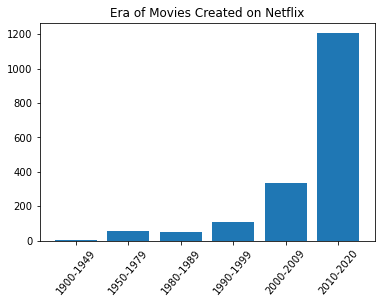

In [14]:
plt.bar(groups, ranges);

plt.title('Era of Movies Created on Netflix');

plt.xticks(rotation=50);

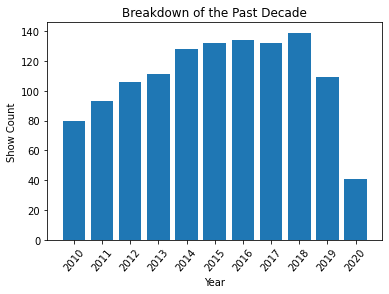

In [15]:
hulu_years = hulu_df.groupby("Year")

hulu_year_count = hulu_years.count().tail(11)

top_11_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

plt.bar(top_11_years,hulu_year_count['Title'])

plt.title('Breakdown of the Past Decade')

plt.xlabel('Year')

plt.ylabel('Show Count')

plt.xticks(rotation=50);

1517

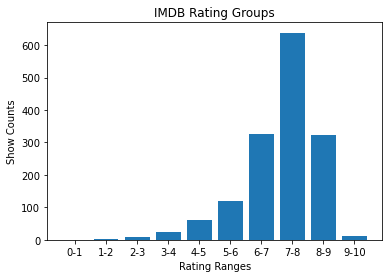

In [16]:
# IMDB Rating Groups using bins
bins2 = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 10]

groups2 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']

hulu_df['IMDB Rating Ranges'] = pd.cut(hulu_df['IMDB'], bins2, labels=groups2)

imdb_rating_ranges = hulu_df.groupby('IMDB Rating Ranges')

ranges2 = imdb_rating_ranges['IMDB Rating Ranges'].count()

plt.bar(groups2, ranges2);

plt.title('IMDB Rating Groups')

plt.xlabel('Rating Ranges')

plt.ylabel('Show Counts')

ranges2.sum()

350

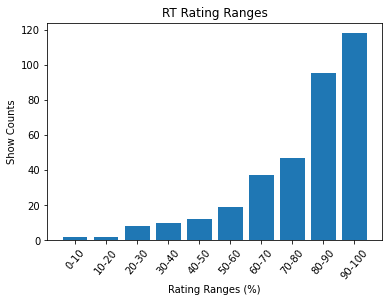

In [17]:
# Rotten Tomatoes Rating Groups using bins

bins3 = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]

groups3 = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

hulu_df_dropped['RT Rating Ranges'] = pd.cut(hulu_df_dropped['RT'], bins3, labels=groups3)

rt_rating_ranges = hulu_df_dropped.groupby('RT Rating Ranges')

ranges3 = rt_rating_ranges['RT Rating Ranges'].count()

plt.bar(groups3, ranges3);

plt.title('RT Rating Ranges')

plt.xlabel('Rating Ranges (%)')

plt.ylabel('Show Counts')

plt.xticks(rotation=50);

ranges3.sum()

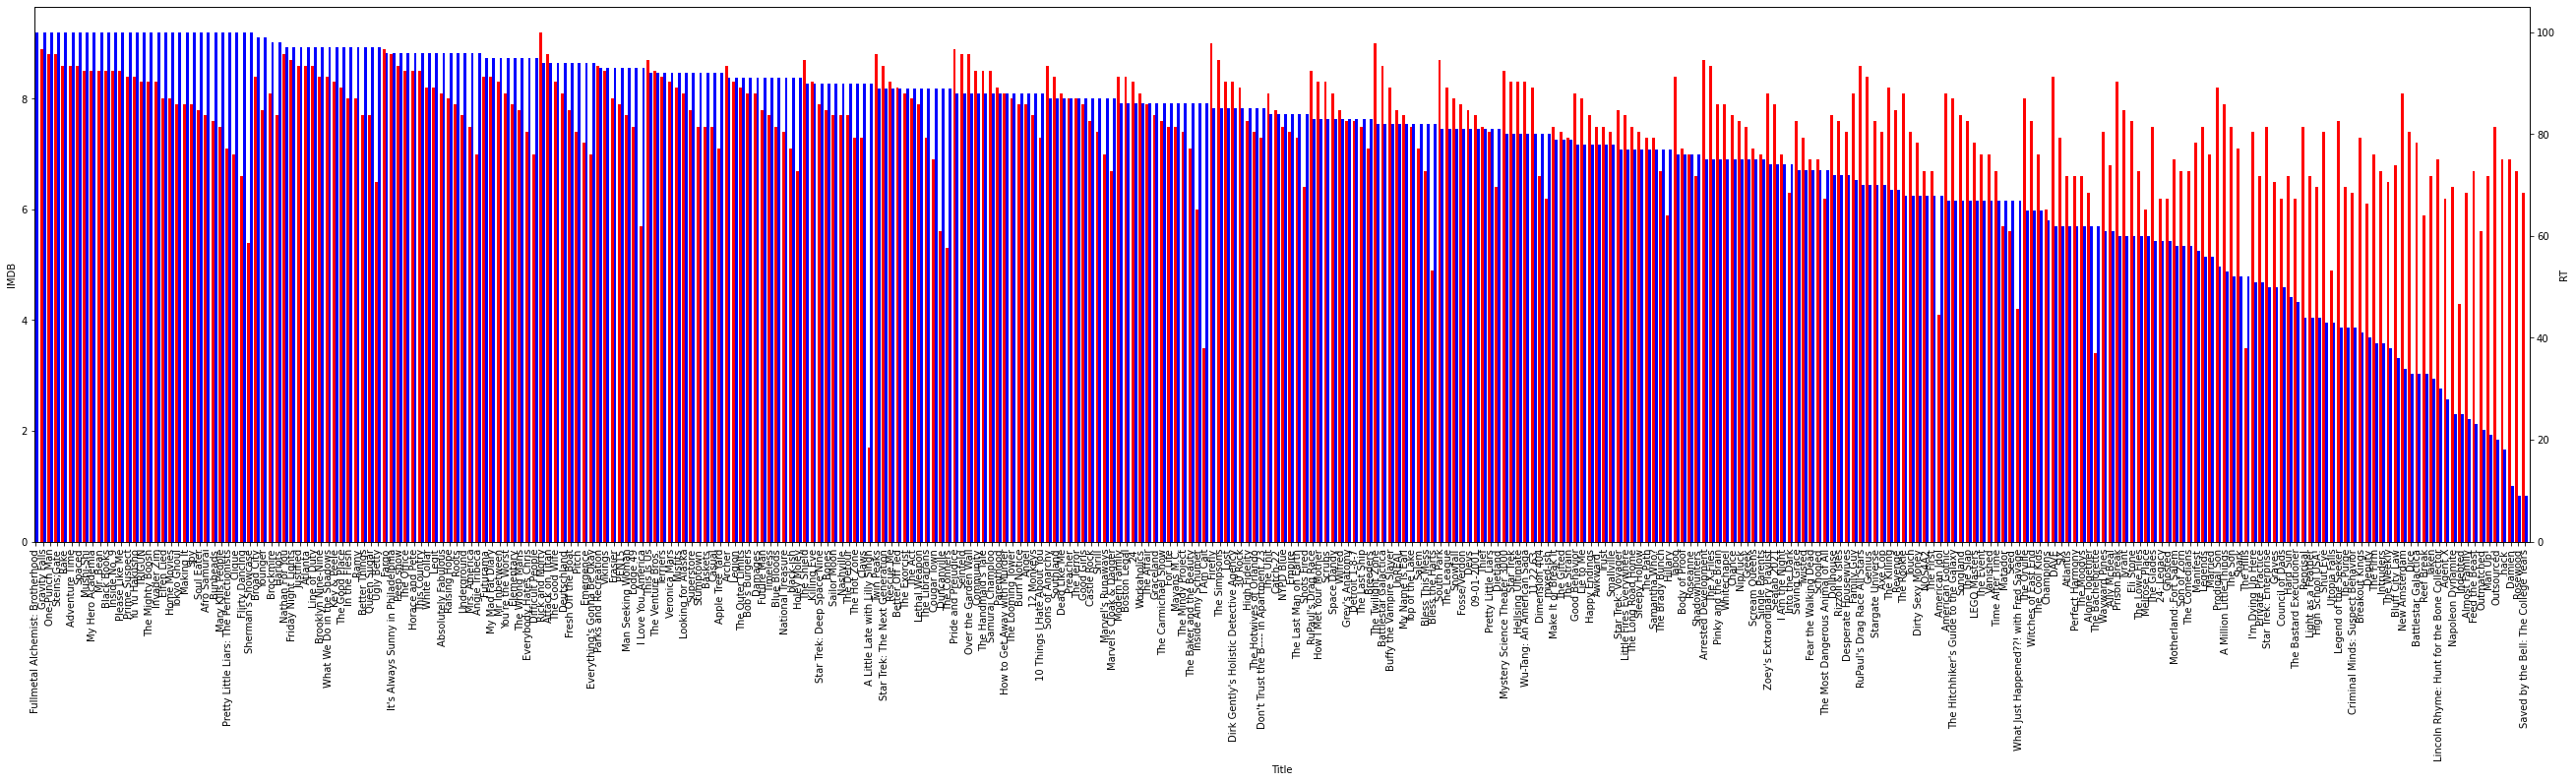

In [18]:
# Compares each show's IMDB and Rotten Tomatoes' rating

fig = plt.figure(figsize=(100,10)) # Create matplotlib figure

ax = fig.add_subplot(121) # Create matplotlib axes

ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

hulu_df_dropped.IMDB.plot(kind='bar', color='red', ax=ax, width=width, position=1);

hulu_df_dropped.RT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0);

ax.set_ylabel('IMDB');

ax2.set_ylabel('RT');

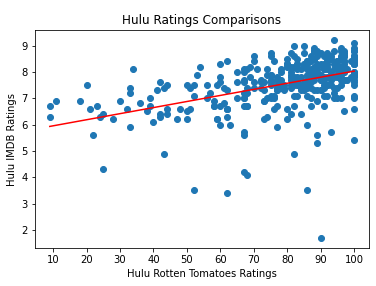

The correlation between both factors is 0.46


In [25]:
# Hulu Ratings Comparisons for shows with both ratings

hulu_RT = hulu_df_dropped['RT']

hulu_IMBD_ratings = hulu_df_dropped['IMDB']


x_values = hulu_RT

y_values = hulu_IMBD_ratings

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq ,(6,10),fontsize=15,color="green")


plt.scatter(hulu_RT,hulu_IMBD_ratings)

plt.plot(x_values,regress_values,"r-")

plt.title('Hulu Ratings Comparisons')

plt.xticks([10,20,30,40,50,60,70,80,90,100])

plt.xlabel('Hulu Rotten Tomatoes Ratings')

plt.ylabel('Hulu IMDB Ratings')

plt.xlim = (0,100)

plt.show()

correlation = st.pearsonr(hulu_RT,hulu_IMBD_ratings)

print(f"The correlation between both factors is {round(correlation[0],2)}")

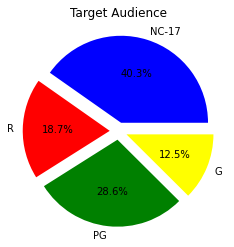

In [26]:
#Hulu Target Audience pie chart

hulu_age_group = hulu_df.groupby("Age")

age_count = hulu_age_group.count()

explode = (.1,0.1,0.1,0.1)

labels = ['NC-17','R','PG','G']

plt.pie(age_count['Title'],explode = explode, labels = labels, colors = ['blue','red','green','yellow','orange'],autopct="%1.1f%%");

plt.title('Target Audience');